### Bringing Trend Filtering into the Continous Domain

Recall Trend Filtering refers to the discrete optimization problem of 

$$ \min_{\mathbf{\beta }} \sum_{i=1}^{n} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j} \right)^{2}+\lambda \sum_{j=1}^{p} \left| \beta_{j}-\beta_{j-1} \right| $$

where $\lambda$ is a tuning parameter. The goal is to find a sequence of $\beta_j$ that minimizes the sum of squared residuals while also minimizing the sum of absolute differences between consecutive $\beta_j$. This is a convex optimization problem and can be solved using standard convex optimization techniques.

The solution is a discrete vector. To bring into the continous domain we utilize the falling factorial basis first suggested by [1]. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../../")
sys.path.append("../../basis/")
sys.path.append("../../estimators/trend_filtering")

from continous_tf import Continous_TF
from falling_factorial_gen import Falling_Factorial_Basis
from trend_filter import Trend_Filter
from matrix_algorithms.difference_matrix import Difference_Matrix


### Generate Noisy Data

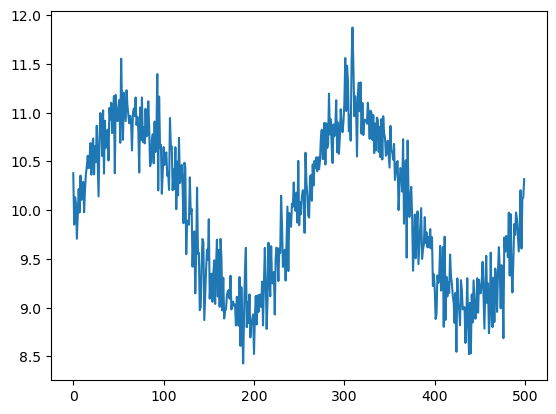

In [2]:
x=np.linspace(0, 2 * np.pi, 500)
noisy_signal =np.sin(2*x) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Sample TF Problem solved with Primal Dual Interior Point Method

Below we solve the TF problem for a sample of data. It utilizes a primal dual interior point method originally suggested by Boyd.

An exponentially spaced grid is used for potential lambda values. 1-fold cross validation is used to select the best lambda value. 

In [3]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='primal_dual',lambda_=1.0)


### Let's Visualize results

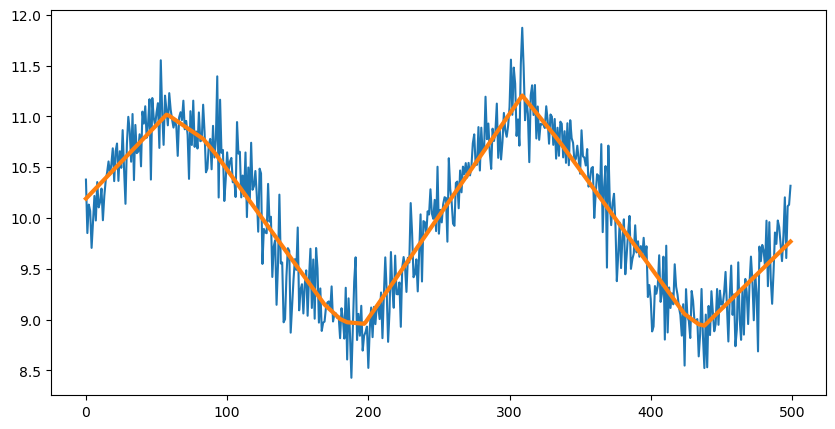

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)

### Same problem solved with ADMM

In [5]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='admm',lambda_=1.0)

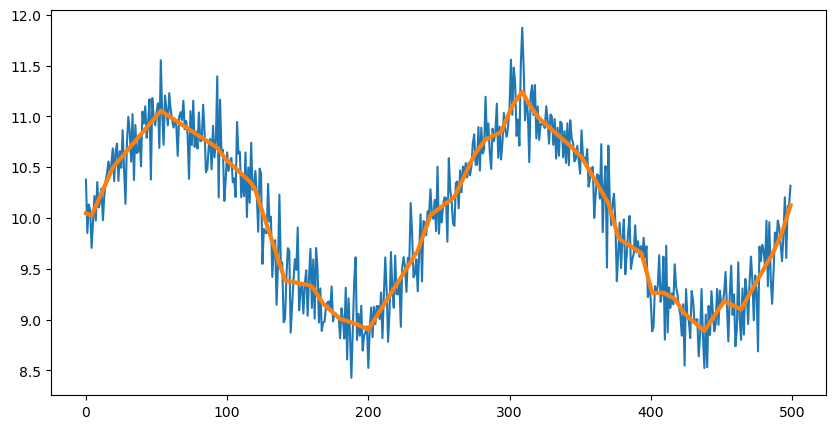

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)


### Construction of Falling Factorial Basis

The falling factorial basis has similar properties to splines and is constructed as follows:

$$ h_{j}(x)=\prod_{i=1}^{j-1} (x-x_l) \quad j=1, \ldots , k+1 $$
$$ h_{k+1+j}(x) = \prod_{i=1}^{k} (x-x_{j+l}) \ 1{x \geq x_{j+k}} \quad j=1 \ldots , n-k-1 $$

such that $h_1(x)=1$

The difference is that the falling factorial basis does not require continuity of derivatives at the knots

In [10]:
x_tf=tf.y_hat

t=np.arange(1,501)

ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [11]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [13]:
D=tf.D

ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[10.04572806]
 [-0.44342997]]
Number of theta coefficients: 498
Theta coefficients: [[-9.88229658e-08]
 [ 1.84315611e-05]
 [ 3.66289455e-05]
 [ 2.94009938e+00]
 [ 4.22257074e-05]
 [ 2.95240472e-05]
 [ 1.62893316e-05]
 [ 2.76149876e-06]
 [-1.08136790e-05]
 [-2.41895259e-05]
 [-3.71234125e-05]
 [-4.93816219e-05]
 [-6.07440052e-05]
 [-7.10083698e-05]
 [-7.99944539e-05]
 [-8.75474450e-05]
 [-9.35409412e-05]
 [-9.78793064e-05]
 [-1.18852403e+00]
 [-8.91069251e-05]
 [-7.61739880e-05]
 [-6.19376679e-05]
 [-4.66598694e-05]
 [-3.06219933e-05]
 [-1.41192152e-05]
 [ 2.54549786e-06]
 [ 1.90675232e-05]
 [ 3.51467313e-05]
 [ 5.04935119e-05]
 [ 6.48345506e-05]
 [ 7.79182244e-05]
 [ 8.95195112e-05]
 [ 9.94442926e-05]
 [ 1.07532981e-04]
 [ 1.13663366e-04]
 [ 1.17752658e-04]
 [ 1.19758668e-04]
 [ 1.19680099e-04]
 [ 1.17555983e-04]
 [ 1.13464243e-04]
 [ 1.07519459e-04]
 [ 9.98698724e-05]
 [ 9.06937112e-05]
 [ 8.01949302e-05]
 [ 6.85984701e-05]
 [ 5.6145146

In [14]:
x_tf[0]-x_tf[1]

array([0.00558347])

In [15]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [105.55]])

### Let's Visualize the Coefficients

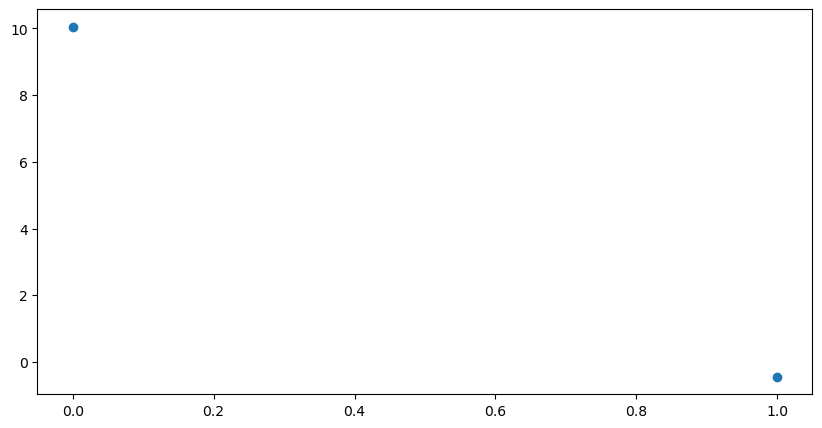

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

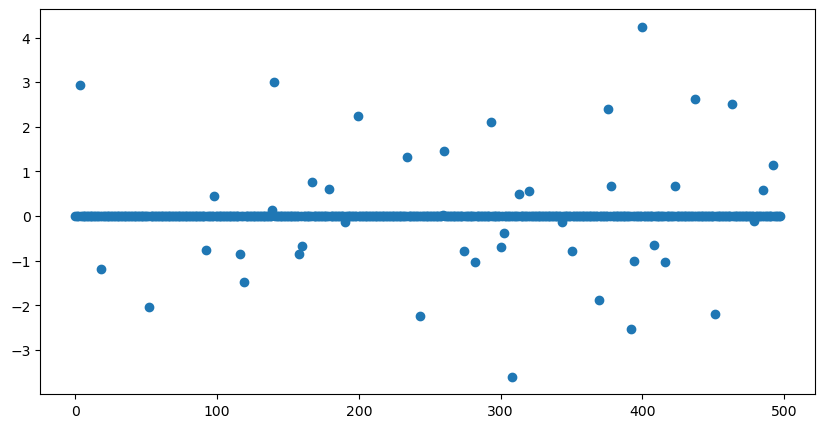

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

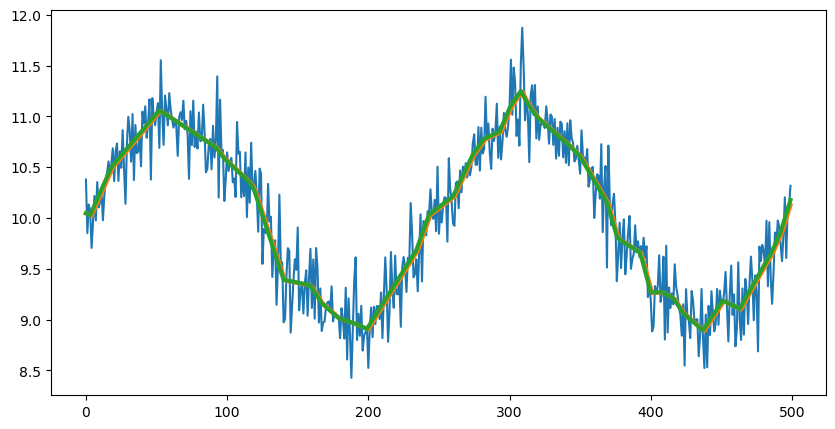

In [20]:
x_equal=x

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)


### References

- The Falling Factorial Basis and Its Statistical Applications https://proceedings.mlr.press/v32/wange14.html
- Fast and Flexible ADMM Algorithms for Trend Filtering https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1054033
